In [10]:
#pip install IneqPy
#pip install inequalipy

In [3]:
import numpy as np 
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn


import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  

import warnings 
warnings.filterwarnings('ignore')

In [5]:
#loading the city data + broadband  
dallas = gpd.read_file("./dallas/city-merged.geojson")
print("The shape of the dataframe is:", dallas.shape)

The shape of the dataframe is: (600, 33)


In [4]:
neighborhood_df = gpd.read_file("./neighborhood_df.csv")

In [7]:
dallas.describe()#i need to deal with duplicates one way or another. 

,n_isp,n_dn10,n_dn100,n_dn250,n_fiber_100u,fiber_100u_exists,max_dn,max_up,f_broadband,f_computer,...,devices,d_mbps,u_mbps,lat_ms,tests_per_cap,devices_per_cap,index_right,COUNCIL,SHAPE_STAr,SHAPE_STLe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000
mean,3.291178,3.023683,1.612110,1.401943,0.445475,0.443902,952.741862,429.252575,0.780053,0.875930,...,98.350267,244.401700,114.675967,14.346167,0.125922,0.050187,6.778333,7.705000,8.151333e+08,273873.451297
std,0.873485,0.860389,0.293374,0.284020,0.263753,0.263375,59.131288,256.024933,0.164029,0.119888,...,74.527715,32.629514,42.258379,6.030663,0.884590,0.386503,4.095585,4.075413,4.747029e+08,197555.911349
min,1.487000,1.359000,0.382000,0.374000,0.000000,0.000000,292.060000,24.936000,0.298000,0.472000,...,8.600000,106.760000,14.690000,6.800000,0.005000,0.003000,0.000000,1.000000,3.124282e+08,88541.304254
25%,2.704000,2.436000,1.417000,1.157500,0.221500,0.215000,944.364000,193.127750,0.658500,0.791750,...,46.487500,225.717500,83.265000,11.400000,0.024000,0.009000,3.000000,4.000000,4.448477e+08,122534.440932
50%,3.161500,2.883000,1.628500,1.423000,0.468000,0.468000,963.853500,434.569000,0.827500,0.926000,...,79.620000,243.680000,119.090000,13.365000,0.049000,0.018000,7.000000,8.000000,5.735295e+08,198681.533746
75%,3.843000,3.542000,1.794000,1.625000,0.653000,0.652000,977.305500,636.558000,0.921000,0.971250,...,120.860000,267.540000,147.645000,15.695000,0.102000,0.032000,11.000000,11.000000,1.132490e+09,363612.475125
max,6.850000,6.544000,2.444000,2.000000,1.000000,1.000000,1000.000000,1000.000000,1.000000,1.000000,...,425.720000,383.960000,253.450000,74.220000,19.099000,7.396000,13.000000,14.000000,1.682483e+09,755160.172489


In [21]:
#for col in dallas.columns:
    #print(col)

In [5]:
#dallas = dallas.drop(['geometry'], axis=1)
df = neighborhood_df.drop(['geometry'], axis = 1)

In [6]:
for col in df.columns:
    print(col)

field_1
City Name
Neighborhood Name
Number of Census Tracts
Population
Households
Neighborhood Size
% Black
% Hispanic
% >25 College Degree
Avg household income
% Broadband Access
% > 100MB Access
Devices per capita


In [7]:
df.head()

,field_1,City Name,Neighborhood Name,Number of Census Tracts,Population,Households,Neighborhood Size,% Black,% Hispanic,% >25 College Degree,Avg household income,% Broadband Access,% > 100MB Access,Devices per capita
0,0,Seattle,2,1,5891.0,2387.0,0.00047549711746305547,0.009,0.046,0.764,134554.0,0.972,0.598,0.02
1,1,Seattle,3,1,4536.0,1668.0,0.00035886523808824567,0.027,0.044,0.879,208636.0,0.991,0.583,0.022
2,2,Seattle,5,1,9140.0,4526.0,0.00031654731843759517,0.013,0.059,0.7,95182.0,0.915,0.774,0.028
3,3,Seattle,6,1,9140.0,4526.0,0.00031654731843759517,0.013,0.059,0.7,95182.0,0.915,0.774,0.028
4,4,Seattle,7,1,5926.0,149.0,0.00039223627324401635,0.055,0.069,0.478,17188.0,0.443,0.04,0.008


In [29]:
df.shape

(2078, 14)

In [8]:
duplicate_rows = np.where(df.duplicated(subset=['City Name', 'Population', 'Households',
       'Neighborhood Size', '% Black', '% Hispanic', '% >25 College Degree',
       'Avg household income', '% Broadband Access', '% > 100MB Access',
       'Devices per capita']))[0]

In [9]:
df = df.drop(duplicate_rows)

## Calculating interquartile range

IQR - "is a measure of statistical dispersion of the data". IQR gives us the range of the middle half of the dataset. By calculating IQR, we understand the middle distribution of broadband data. 


In [10]:
df['% Broadband Access'] = pd.to_numeric(df['% Broadband Access'])
df['Avg household income'] = pd.to_numeric(df['Avg household income'])

In [87]:
#df_city = df[df['City Name'] == 'Seattle']

In [11]:
def iqr_broadband(city): 

    df_city = df[df['City Name'] == city]
    df_city_broadband = df_city['% Broadband Access']
    array_city_broadband = np.array(df_city_broadband)
    Q3 = np.quantile(array_city_broadband, 0.75) 
    Q1 = np.quantile(array_city_broadband, 0.25)
    iqr_results = Q3 - Q1
    
    return iqr_results

In [12]:
results_iqr = []

for city in df['City Name'].unique():
    print(city, iqr_broadband(city))
    results_iqr.append(iqr_broadband(city))
    
iqr_broadband_df = pd.DataFrame({'City Name': df['City Name'].unique(), "IQR Broadband" : results_iqr})

Seattle 0.05962500000000004
Denver 0.060630681818181764
Portland 0.04764236111111109
Washington, D.C. 0.18402857142857143
Boston nan
Albuquerque 0.11062499999999986
Houston 0.15476515151515147
Indianapolis 0.10889204545454545
Los Angeles 0.10528026849037486
Phoenix 0.15715944087936573
San Francisco 0.06314285714285706
Austin 0.11740714285714282
Dallas 0.21428518692564735
San Jose 0.039700420168067296
San Diego 0.07402415458937195
Baltimore 0.18869999999999998
Detroit nan
Louisville nan


In [13]:
iqr_broadband_df

,City Name,IQR Broadband
0,Seattle,0.059625
1,Denver,0.060631
2,Portland,0.047642
3,"Washington, D.C.",0.184029
4,Boston,NaN
5,Albuquerque,0.110625
6,Houston,0.154765
7,Indianapolis,0.108892
8,Los Angeles,0.105280
9,Phoenix,0.157159


In [14]:
def iqr_income(city): 

    df_city = df[df['City Name'] == city]
    df_city_income = df_city['Avg household income']
    array_city_income = np.array(df_city_income)
    Q3 = np.quantile(array_city_income, 0.75) 
    Q1 = np.quantile(array_city_income, 0.25)
    iqr_range = Q3 - Q1
    
    return iqr_range

In [15]:
iqr_income('San Diego')

53174.884615384595

In [16]:
results = []
for city in df['City Name'].unique():
    print(city, iqr_income(city))
    results.append(iqr_income(city))
    
iqr_income_df = pd.DataFrame({'City Name': df['City Name'].unique(), "IQR Income" : results})

Seattle 35407.80416666668
Denver 25519.777272727275
Portland 33286.739285714284
Washington, D.C. 72058.56796328671
Boston nan
Albuquerque 28817.25
Houston 33168.03750000001
Indianapolis 27304.887500000004
Los Angeles 37274.174388674364
Phoenix 39376.07240215925
San Francisco 64972.18571428573
Austin 27420.18571428572
Dallas 35263.49322179322
San Jose 46103.3785699062
San Diego 53174.884615384595
Baltimore 23337.333333333336
Detroit nan
Louisville nan


In [17]:
iqr_income_df = iqr_income_df.sort_values(by = ['IQR Income'])
iqr_income_df

,City Name,IQR Income
15,Baltimore,23337.333333
1,Denver,25519.777273
7,Indianapolis,27304.887500
11,Austin,27420.185714
5,Albuquerque,28817.250000
6,Houston,33168.037500
2,Portland,33286.739286
12,Dallas,35263.493222
0,Seattle,35407.804167
8,Los Angeles,37274.174389


In [20]:
iqr = iqr_income_df.merge(iqr_broadband_df, right_on = 'City Name', left_on = 'City Name')

iqr = iqr.sort_values(by = ['IQR Income'])

In [19]:
iqr = iqr.dropna(inplace= True)


#### plotting iqr broadband to iqr wealth 

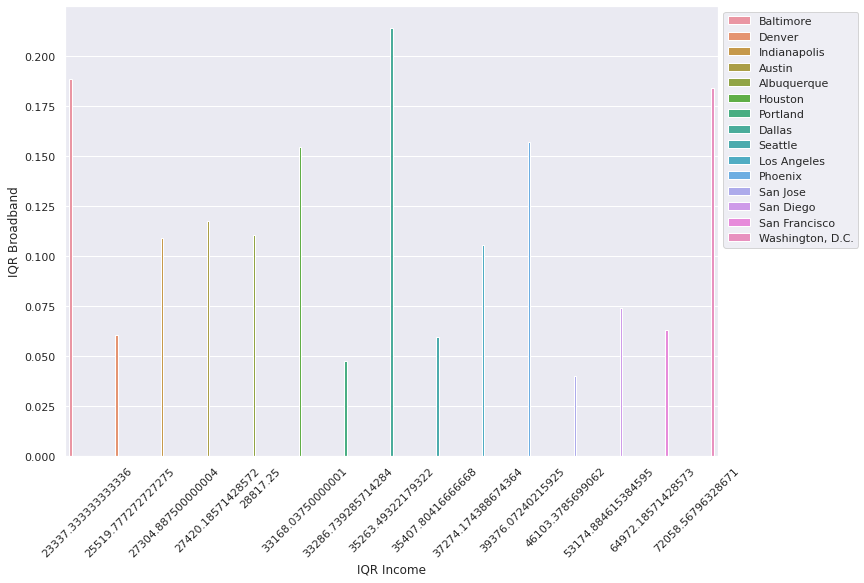

In [210]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

fig, ax = plt.subplots()

sns.barplot(data=iqr, x="IQR Income", y="IQR Broadband", hue = "City Name")

ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.xticks(rotation = 45)

plt.show()

In [ ]:
#reduce iqr to 2 decimal points to make visualization easier 

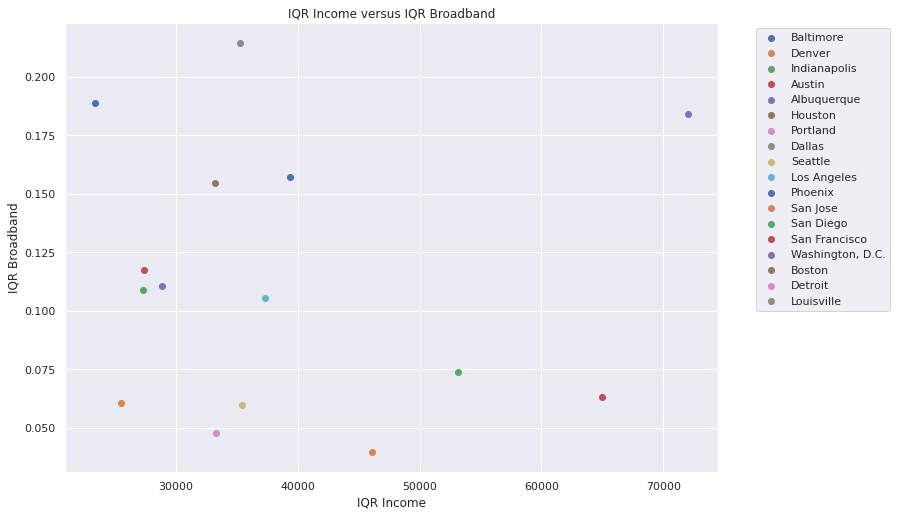

In [24]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})

cities = iqr['City Name'].unique()

fig, ax = plt.subplots()

for city in range(len(cities)): 
    iqr_city = iqr.loc[iqr['City Name'] == cities[city]]
    x, y = iqr_city['IQR Income'], iqr_city['IQR Broadband']
    ax.scatter(x, y, label=cities[city])

ax.legend(bbox_to_anchor=(1.05, 1.0))
plt.xlabel('IQR Income')
plt.ylabel('IQR Broadband')
plt.title('IQR Income versus IQR Broadband')
ax.grid(True)
    
plt.show()

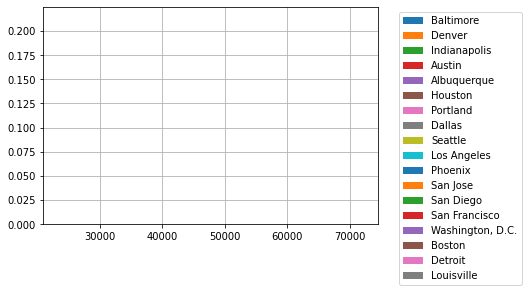

In [124]:
cities = iqr['City Name'].unique()

fig, ax = plt.subplots()

for city in range(len(cities)): 
    iqr_city = iqr.loc[iqr['City Name'] == cities[city]]
    x, y = iqr_city['IQR Income'], iqr_city['IQR Broadband']
    ax.bar(x, y, label=cities[city])

ax.legend(bbox_to_anchor=(1.05, 1.0))

ax.grid(True)
    
plt.show()

### Removing outliers to see if that changes the IQR 

Filtering out outliers in every city will allow us to make sure that we are not misrepresenting the data. 

#finding outliers: 
https://www.statology.org/remove-outliers-python/


In [25]:
def removeOutliers(data, col): 
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1 
    
    print("The interquartile range for column % is: %" % (col, IQR))
    global outlier_free_list 
    global filtered_data 
    
    lower_range = Q1 - 1.5 * IQR 
    upper_range = Q3 + 1.5 * IQR 
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    
    for i in data.columns:
        if i == data.columns[0]:
            removeOutliers(data, i)
        else: 
            removeOutliers(filtered_data, i)

In [89]:
#df_city.head

## Lorenz curve 

In [ ]:
#ineqpy.skew(variable=x, weights=w)
#https://towardsdatascience.com/statistical-indexes-for-measuring-inequality-7f2ca72fd65e

In [13]:
def lorenz_curve(df): 
    
    cities = list(df['City Name'].unique())
    
    results = pd.DataFrame("", index = cities, columns = ['skewness'])  
    
    for city in cities: 
        df_city = df[df['City Name'] == city]
        skewness = ineq.skew(df_city['% Broadband Access'], df_city['Population'])
        result.loc[city, 'skewness'] = skewness

    results['skewness'] = results['skewness'].apply(pd.to_numeric)
    
    return results  

In [27]:
cities = list(df['City Name'].unique())
df_city = df[df['City Name'] == "Seattle"]
skewness = ineq.skew(df_city['% Broadband Access'], df_city['Population'])


AttributeError: module 'ineqpy' has no attribute 'theil'

In [7]:
lorenz_curve(df)

## Hoover/Robinhood index

Example: https://mmngreco.github.io/IneqPy/_modules/ineqpy/inequality.html
https://en.wikipedia.org/wiki/Hoover_index
https://search.r-project.org/CRAN/refmans/REAT/html/hoover.html


Explanation: 
Hoover is a measure of income inequality. "It is equal to the portion of the total community income that would have to be redistributed (taken from the richer half of the population and given to the poorer half) for there to be income uniformity." 

i.e. The Hoover is the total amount (as a percentage of the national-income) by which people have less than their equal income-share.

Formula: H = 1/2 sum_i( |xi - mu| ) / sum_i(xi)

In [21]:
def hoover(df): 
    cities = list(df['City Name'].unique())
    
    results = pd.DataFrame("", index = cities, columns = ['hoover'])  
    
    for city in cities: 
        df_city = df[df['City Name'] == city]
        df_city_broadband = df_city['% Broadband Access']
        weights = df_city['Population'] 
        n = weights.size 
        hoover_index = 0.5 * np.absolute(weights - 1.0 / n).sum()
        results.loc[city, 'hoover'] = hoover_index
        
    results['hoover'] = results['hoover_income'].apply(pd.to_numeric)



In [22]:
#hoover(df)

AttributeError: 'Series' object has no attribute 'weights'

In [ ]:
#maybe also add broadband? 
#we could do both side by side 
#df[["1of3", "2of3", "3of3"]] = np.random.randint(10, size=(4,3))